# Understanding Lazy Evaluation in Polars

In [13]:
import pandas as pd
import polars as pl
import time
from IPython.display import SVG, display

read csv file with pandas

In [3]:
start = time.time()

df = pd.read_csv('data/flight_kaggle/flights.csv')
df = df.loc[(df['MONTH'] == 12) &
            (df['ORIGIN_AIRPORT'] == 'SEA') &
            (df['DESTINATION_AIRPORT'] == 'DFW')
            ]

end = time.time()
print(end - start)
df.head()

C:\Users\Aco\AppData\Local\Temp\ipykernel_10168\1140352191.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/flight_kaggle/flights.csv')


32.23352313041687


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5339849,2015,12,1,2,AA,1230,N3KSAA,SEA,DFW,5,...,538.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5339922,2015,12,1,2,AA,1228,N3AMAA,SEA,DFW,500,...,1056.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5341203,2015,12,1,2,AS,658,N302AS,SEA,DFW,640,...,1210.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5341275,2015,12,1,2,AA,1308,N3BDAA,SEA,DFW,645,...,1234.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5343046,2015,12,1,2,AA,143,N3FCAA,SEA,DFW,830,...,1425.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


read csv file with polars using `pl.read_csv()` - an *eager execution*

In [4]:
start = time.time()

df = pl.read_csv('data/flight_kaggle/flights.csv').filter(
    (pl.col('MONTH') == 12) &
    (pl.col('ORIGIN_AIRPORT') == 'SEA') &
    (pl.col('DESTINATION_AIRPORT') == 'DFW')
)

end = time.time()
print(end - start)
df.head()

5.800471067428589


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null


read csv file with polars using `pl.scan_csv()` - a *lazy execution* - The `scan_csv()` method delays execution until the `collect()` method is called

`pl.scan_csv()` method is known as an ***implicit lazy method***

In [5]:
start = time.time()

df = pl.scan_csv('data/flight_kaggle/flights.csv').filter(
    (pl.col('MONTH') == 12) &
    (pl.col('ORIGIN_AIRPORT') == 'SEA') &
    (pl.col('DESTINATION_AIRPORT') == 'DFW')
).collect()

end = time.time()
print(end - start)
df.head()

2.6758546829223633


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null


call `lazy()` method to make eager execution to be lazy evaluation

this method is called ***Explicit Lazy Evaluation***

In [6]:
start = time.time()

df = pl.read_csv('data/flight_kaggle/flights.csv') \
    .lazy() \
    .filter(
        (pl.col('MONTH') == 12) &
        (pl.col('ORIGIN_AIRPORT') == 'SEA') &
        (pl.col('DESTINATION_AIRPORT') == 'DFW')).collect()

end = time.time()
print(end - start)
df.head()

2.505751371383667


YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
i64,i64,i64,i64,str,i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,i64
2015,12,1,2,"""AA""",1230,"""N3KSAA""","""SEA""","""DFW""",5,9,4,10,19,230,209,194,1660,533,5,555,538,-17,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1228,"""N3AMAA""","""SEA""","""DFW""",500,459,-1,16,515,234,237,198,1660,1033,23,1054,1056,2,0,0,null,null,null,null,null,null
2015,12,1,2,"""AS""",658,"""N302AS""","""SEA""","""DFW""",640,644,4,12,656,220,206,190,1660,1206,4,1220,1210,-10,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",1308,"""N3BDAA""","""SEA""","""DFW""",645,640,-5,24,704,233,234,197,1660,1221,13,1238,1234,-4,0,0,null,null,null,null,null,null
2015,12,1,2,"""AA""",143,"""N3FCAA""","""SEA""","""DFW""",830,830,0,25,855,233,235,200,1660,1415,10,1423,1425,2,0,0,null,null,null,null,null,null


## Understanding the LazyFrame object

In [7]:
pl.scan_csv('data/flight_kaggle/airports.csv')

<LazyFrame [7 cols, {"IATA_CODE": Utf8 … "LONGITUDE": Float64}] at 0x1C53A0B0460>

In [8]:
pl.scan_csv('data/flight_kaggle/airports.csv').collect()

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447
"""ACK""","""Nantucket Memo…","""Nantucket""","""MA""","""USA""",41.25305,-70.06018
"""ACT""","""Waco Regional …","""Waco""","""TX""","""USA""",31.61129,-97.23052
"""ACV""","""Arcata Airport…","""Arcata/Eureka""","""CA""","""USA""",40.97812,-124.10862
"""ACY""","""Atlantic City …","""Atlantic City""","""NJ""","""USA""",39.45758,-74.57717


Using enclose query

In [44]:
q = (
    pl.scan_csv('data/flight_kaggle/airports.csv')
)

q.collect()

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447
"""ACK""","""Nantucket Memo…","""Nantucket""","""MA""","""USA""",41.25305,-70.06018
"""ACT""","""Waco Regional …","""Waco""","""TX""","""USA""",31.61129,-97.23052
"""ACV""","""Arcata Airport…","""Arcata/Eureka""","""CA""","""USA""",40.97812,-124.10862
"""ACY""","""Atlantic City …","""Atlantic City""","""NJ""","""USA""",39.45758,-74.57717


using `fetch()` method to return the first *n* rows

In [46]:
q.fetch(5)

IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
str,str,str,str,str,f64,f64
"""ABE""","""Lehigh Valley …","""Allentown""","""PA""","""USA""",40.65236,-75.4404
"""ABI""","""Abilene Region…","""Abilene""","""TX""","""USA""",32.41132,-99.6819
"""ABQ""","""Albuquerque In…","""Albuquerque""","""NM""","""USA""",35.04022,-106.60919
"""ABR""","""Aberdeen Regio…","""Aberdeen""","""SD""","""USA""",45.44906,-98.42183
"""ABY""","""Southwest Geor…","""Albany""","""GA""","""USA""",31.53552,-84.19447


You can chain the various methods in a single query

In [49]:
q = (
    pl.scan_csv('data/flight_kaggle/airports.csv')
    .select(['AIRPORT','CITY', 'LATITUDE'])
    .filter(
        pl.col('LATITUDE') > 18
    )
)

`show_graph()` method displays the execution graph

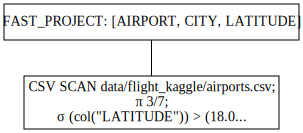

In [50]:
q.show_graph(optimized=True)

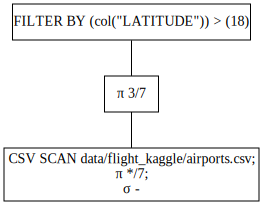

In [51]:
q.show_graph(optimized=False)

In [52]:
q.collect()

AIRPORT,CITY,LATITUDE
str,str,f64
"""Lehigh Valley …","""Allentown""",40.65236
"""Abilene Region…","""Abilene""",32.41132
"""Albuquerque In…","""Albuquerque""",35.04022
"""Aberdeen Regio…","""Aberdeen""",45.44906
"""Southwest Geor…","""Albany""",31.53552
"""Nantucket Memo…","""Nantucket""",41.25305
"""Waco Regional …","""Waco""",31.61129
"""Arcata Airport…","""Arcata/Eureka""",40.97812
"""Atlantic City …","""Atlantic City""",39.45758


In [53]:
q.fetch(5)

AIRPORT,CITY,LATITUDE
str,str,f64
"""Lehigh Valley …","""Allentown""",40.65236
"""Abilene Region…","""Abilene""",32.41132
"""Albuquerque In…","""Albuquerque""",35.04022
"""Aberdeen Regio…","""Aberdeen""",45.44906
"""Southwest Geor…","""Albany""",31.53552
